In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Membaca Dataset
df = pd.read_csv('/content/ecommerce_sales_34500.csv')
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female


In [3]:
df.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,4.814203,170.008494,6.152120,28.116505,43.474377
std,195.620477,0.069894,0.932270,1.242141,357.503014,2.389539,53.352947,14.980682
min,1.010000,0.000000,1.000000,3.000000,0.820000,0.000000,-6.200000,18.000000
25%,16.690000,0.000000,1.000000,4.000000,19.710000,4.420000,1.500000,31.000000
50%,45.660000,0.000000,1.000000,5.000000,56.820000,6.090000,10.550000,43.000000
75%,130.950000,0.100000,2.000000,6.000000,168.530000,7.830000,33.132500,56.000000
max,2930.470000,0.300000,5.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


# Data Understanding

Deskripsi Dataset :
Dataset ini berisi informasi mengenai ecommerce sales yang dikumpulkan dari 2023 September Hingga 2025 September dengan periode 2 Tahun. Dataset digunakan untuk menganalisis seperti perilaku pengguna, tren performa, dan variabel yang mempengaruhi hasil bisnis.

Dataset ini terdiri dari baris dan column sebanyak 34500 baris dan 17 column

Dengan Deskripsi column :

1.   Order_id : Urutan order berdasarkan urutan pembelian
2.   Customer_id : Urutan Customer berdasarkan urutan pertama kali melakukan transaksi
3.   Product_id : Urutan product yg di jual berdasarkan category
4.   category : Category berdasarkan fungsi product
5.   Price : Harga pembelian per pcs barang
6.   Discount : Discount applied (%)
7.   Quantity : Pcs pembelian
8.   payment_method : tipe pembayaran
9.   order_date : Tanggal Pembelian
10.  delivery_time_days : lamanya pengantaran barang
11.  region : wilayah Customer
12.  returned : pengembalian barang
13.  total amount : total yg harus di bayar
14.  shipping_cost : pembayaran pengiriman
15.  profit_margin : margin profit
16.  customer_age : umur customer

# Tujuan Analisa

Proyek ini bertujuan untuk melakukan segmentasi pelanggan berdasarkan perilaku belanja menggunakan metode RFM (Recency, Frequency, Monetary).
Hasil segmentasi diharapkan mampu memaksimalkan profit, misalnya dengan memberikan program promosi kepada pelanggan dengan nilai recency rendah (pelanggan yang lama tidak bertransaksi) serta menyusun program loyalitas bagi pelanggan yang memiliki skor RFM tinggi dan sangat loyal.

In [4]:
df[(df['category'] == 'Grocery') & (df['profit_margin'] < 0)]

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
9,O100009,C16265,P207782,Grocery,10.91,0.00,1,Credit Card,2023-10-31,6,South,No,10.91,2.76,-1.89,56,Male
12,O100012,C14426,P245991,Grocery,10.56,0.10,1,Credit Card,2024-10-13,4,West,No,9.50,4.99,-4.23,22,Female
28,O100028,C15311,P205022,Grocery,20.97,0.00,2,PayPal,2024-05-27,6,South,No,41.94,4.61,-1.25,61,Female
31,O100031,C11184,P231480,Grocery,10.32,0.15,1,Debit Card,2024-04-08,7,East,No,8.77,1.24,-0.54,32,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34472,O134472,C13764,P225113,Grocery,21.77,0.00,2,Debit Card,2025-06-06,7,East,No,43.54,6.17,-2.69,38,Female
34480,O134480,C10895,P237405,Grocery,12.26,0.10,5,Debit Card,2025-08-08,3,North,No,55.17,7.86,-3.45,37,Female
34482,O134482,C13753,P218095,Grocery,5.19,0.05,1,UPI,2024-11-20,6,East,No,4.93,1.76,-1.37,33,Female
34491,O134491,C17771,P231766,Grocery,14.33,0.00,1,Debit Card,2024-10-19,5,West,No,14.33,4.87,-3.72,67,Male


# Data Cleansing

In [5]:
df.isna().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
price,0
discount,0
quantity,0
payment_method,0
order_date,0
delivery_time_days,0


Tidak ada nilai yang hilang

In [6]:
#cek type data apakah sesuai tidak ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [7]:
#Mengganti Type order_date
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


# Data Manipulation

In [8]:
#Mencari nilai duplicated
len(df.duplicated())/len(df)

1.0

In [9]:
#Menambahkan column Fixed pay by customer
df['fixed_pay_by_customer'] = df['total_amount'] + df['shipping_cost']
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,fixed_pay_by_customer
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female,147.35
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male,29.33
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male,173.38
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female,69.17
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male,16.62


1 artinya tidak ada yang terduplikasi

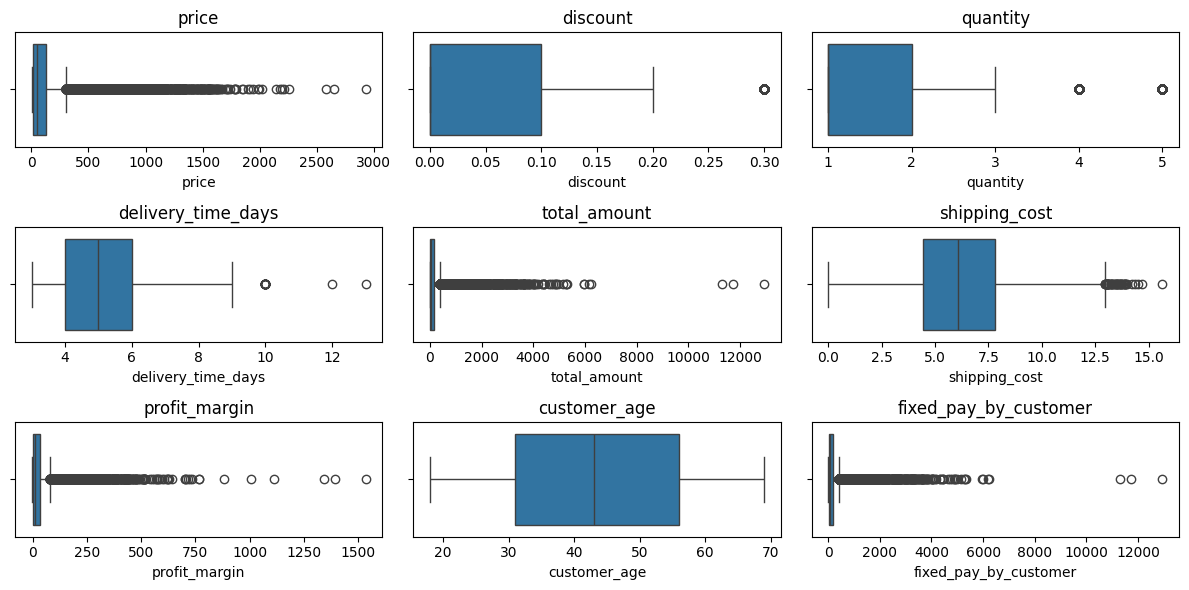

In [10]:
#cek outlier
num_cols = ['price','discount','quantity','delivery_time_days',
            'total_amount','shipping_cost','profit_margin','customer_age','fixed_pay_by_customer']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Dari data diatas terdapat 9 grafik yang menunjukan bahwa setiap grafiknya menunjukan outlier mulai dari price sampai fixed pay by customer , disini saya tidak perlu menghandle outlier karena itu menunjukan profit yang sangat besat dan tidak masuk akal jika di handle

# EDA Dan Customer Segmentation

EDA

In [11]:
#Mencari info dasar
print("\n--- Informasi Dataset ---")
print(f"Jumlah Baris & Kolom: {df.shape}")
print(f"Jumlah Pelanggan Unik: {df['customer_id'].nunique()}")
print(f"Rentang Tanggal: {df['order_date'].min().date()} sampai {df['order_date'].max().date()}")
print(f"Total Penjualan: ${df['total_amount'].sum():,.2f}")
print(f'Total Profit: ${df["profit_margin"].sum():,.2f}')
print(f'Jumlah Category: {df["category"].nunique()}')
print(f'Jumlah Region: {df["region"].nunique()}')


--- Informasi Dataset ---
Jumlah Baris & Kolom: (34500, 18)
Jumlah Pelanggan Unik: 7903
Rentang Tanggal: 2023-09-12 sampai 2025-09-11
Total Penjualan: $5,865,293.05
Total Profit: $970,019.41
Jumlah Category: 7
Jumlah Region: 5


Product apa yang paling laris tiap wilayahnya

In [12]:
product = df.groupby(['category','region'])['customer_id'].count().reset_index(name='count')
product

,category,region,count
0,Beauty,Central,676
1,Beauty,East,802
2,Beauty,North,926
3,Beauty,South,918
4,Beauty,West,781
5,Electronics,Central,943
6,Electronics,East,1262
7,Electronics,North,1334
8,Electronics,South,1409
9,Electronics,West,1232


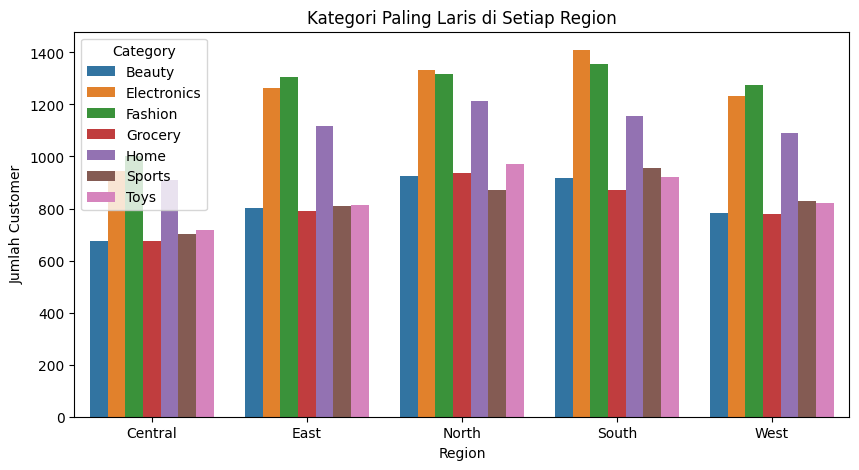

In [13]:
#Visualisasi category paling laris pada tiap region

plt.figure(figsize=(10,5))
sns.barplot(
    data=product,
    x="region",
    y="count",
    hue="category"
)

plt.title("Kategori Paling Laris di Setiap Region")
plt.xlabel("Region")
plt.ylabel("Jumlah Customer")
plt.legend(title="Category")
plt.show()


Secara visualisasi keseluruhanya ialah category paling laris category tertinggi ialah electronik yang berwilayah di selatan dan utara , namun di wilayah tengah,timur dan barat paling laris fasion hanya 2 category mendominasi setiap wilayah

Yang berkorelasi terhadap total_profit?

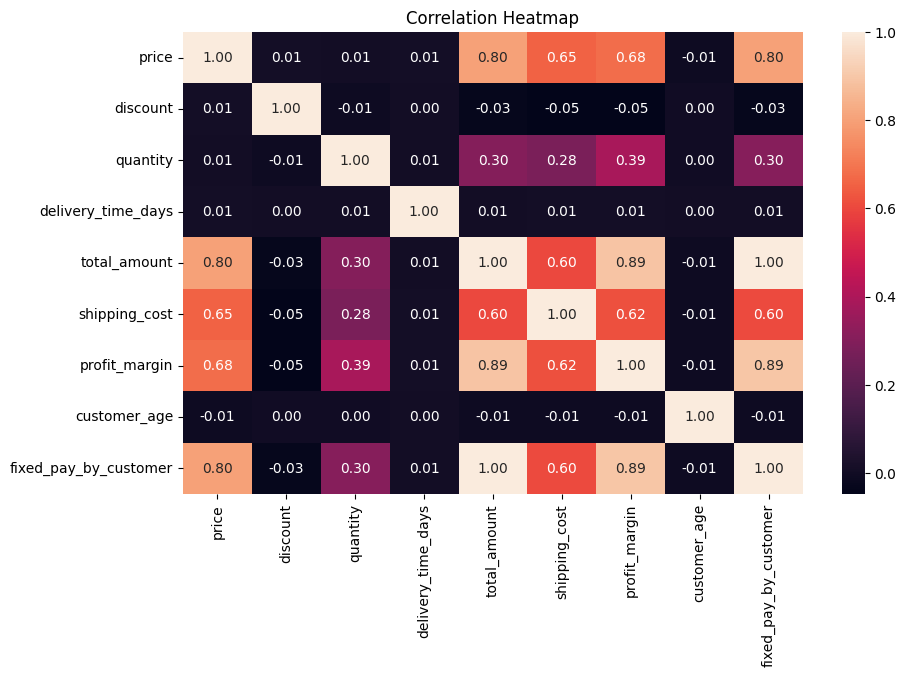

In [14]:
num_cols = ['price','discount','quantity','delivery_time_days','total_amount','shipping_cost','profit_margin','customer_age','fixed_pay_by_customer']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Setelah EDA di lakukan di dapat suatu hubungan variabel dengan menggunakan heatmap di dapat yang dapat mempengaruhi profit margin itu sendiri ialah total_amount dan harga pembelian juga disini di quantity berperan cukup rendah

Customer Segmentation (RFM)

In [15]:
# 1. Tentukan Tanggal Referensi
reference_date = df['order_date'].max() + dt.timedelta(days=1)
print(f"\nTanggal Referensi Analisis: {reference_date.date()}")

# 2. Hitung RFM per Customer
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'total_amount': 'sum'
}).reset_index()

# 3. Menampilkan Column
print('-----------------------Column RFM--------------------------')
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.head()


Tanggal Referensi Analisis: 2025-09-12
-----------------------Column RFM--------------------------


,customer_id,Recency,Frequency,Monetary
0,C10000,5,2,210.58
1,C10001,194,5,3246.02
2,C10002,401,5,216.85
3,C10003,72,3,154.30
4,C10004,600,3,716.99


In [56]:
def assign_segment(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])

    # 1. Champion
    if r >= 4 and f == 3 and m == 3:
        return "Champion"

    # 2. Loyal Customers
    elif r >= 3 and f >= 2 :
        return "Loyal Customers"

    # 3. New Customers
    elif r >= 4 and f == 1:
        return "New Customers"

    # 4. Need Attention
    elif r == 3 and f <= 2:
        return "Need Attention"

    # 5. At Risk
    elif r <= 2 and f >= 2:
        return "At Risk"

    # 6. Hibernating
    elif r <= 2 and f >= 1:
        return "Hibernating"
    else:
        return "Other"


rfm['Segment'] = rfm.apply(assign_segment, axis=1)
rfm[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']].head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
0,C10000,5,2,210.58,511,New Customers
1,C10001,194,5,3246.02,223,At Risk
2,C10002,401,5,216.85,121,At Risk
3,C10003,72,3,154.30,411,New Customers
4,C10004,600,3,716.99,112,Hibernating


In [57]:
rfm['Segment'].value_counts()

,count
Segment,
Loyal Customers,2759
Hibernating,1760
At Risk,1384
Champion,800
New Customers,715
Need Attention,485


In [58]:
rfm[rfm['Segment'] == 'Hibernating'].value_counts()

,,,,,,,,,count
customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,
C17922,392,1,13.31,1,1,1,111,Hibernating,1
C17919,205,2,199.70,2,1,1,211,Hibernating,1
C17918,207,3,79.09,2,1,1,211,Hibernating,1
C17912,171,1,21.94,2,1,1,211,Hibernating,1
C17907,153,3,182.94,2,1,1,211,Hibernating,1
...,...,...,...,...,...,...,...,...,...
C10014,284,2,215.05,1,1,1,111,Hibernating,1
C10010,377,3,1578.00,1,1,3,113,Hibernating,1
C10006,201,2,355.74,2,1,2,212,Hibernating,1


In [55]:
#Ekspor ke CSV untuk Power BI
rfm.to_csv('project_DA.csv', index=False , decimal=",")
#Ekspor ke CSV data yg telah di lakukan EDA
df.to_csv('Project_DA1.csv', index=False , decimal=",")